<a href="https://colab.research.google.com/github/YusraShereen/Open-AIMP/blob/main/Object_Detection_Utility_Dataset_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OPEN AIMP**

## **TASK # 1**


## Author: Yusra Shereen

### Cloning Repository

In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 9118, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 9118 (delta 81), reused 93 (delta 42), pack-reused 8963
Receiving objects: 100% (9118/9118), 9.54 MiB | 26.19 MiB/s, done.
Resolving deltas: 100% (6325/6325), done.
/content/yolov5
HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)


In [ ]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     |████████████████████████████████| 636 kB 5.3 MB/s 
Setup complete. Using torch 1.9.0+cu102 CPU


### Contents of data.yaml file

In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cd /content/drive/MyDrive/Open AIMP/ODM
%cat data.yaml

/content/drive/MyDrive/Open AIMP/ODM
train: /content/drive/MyDrive/Open AIMP/ODM/Data/train/images
val: /content/drive/MyDrive/Open AIMP/ODM/Data/valid/images

nc: 27
names: ['dog', 'person', 'cat', 'tv', 'car', 'meatballs', 'marinara sauce', 'tomato soup', 'chicken noodle soup', 'french onion soup', 'chicken breast', 'ribs', 'pulled pork', 'hamburger', 'cavity', 'Meter', 'MeterReading', 'MeterFittingPipe', '0', '8', '6', '5', '1', '3', '7', '4', '9']

# Define Model Configuration and Architecture


In [ ]:
# define number of classes based on YAML
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
#this is the model configuration we will use for our tutorial 
%cat /content/yolov5/models/yolov5s.yaml

# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C

In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

# Train Custom YOLOv5 Detector

In [ ]:

%%time
%cd /content/yolov5/
!python train.py --batch 15 --epochs 1 --data '/content/drive/MyDrive/Open AIMP/ODM/data.yaml' --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5l_results  --cache

/content/yolov5
github: ⚠️ WARNING: code is out of date by 449 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 v4.0-126-g886f1c0 torch 1.9.0+cu102 CPU

Namespace(adam=False, batch_size=15, bucket='', cache_images=True, cfg='./models/custom_yolov5s.yaml', data='/content/drive/MyDrive/Open AIMP/ODM/data.yaml', device='', entity=None, epochs=1, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], linear_lr=False, local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='yolov5l_results', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov5l_results3', single_cls=False, sync_bn=False, total_batch_size=15, weights='', workers=8, world_size=1)
wandb: Install Weights & Biases for YOLOv5 logging with 'pip install wandb' (recommended)
Start Tensorboard with "tensorboard

# Evaluate Custom YOLOv5 Detector

## Visualize Our Training Data with Labels

TRAINING DATA:


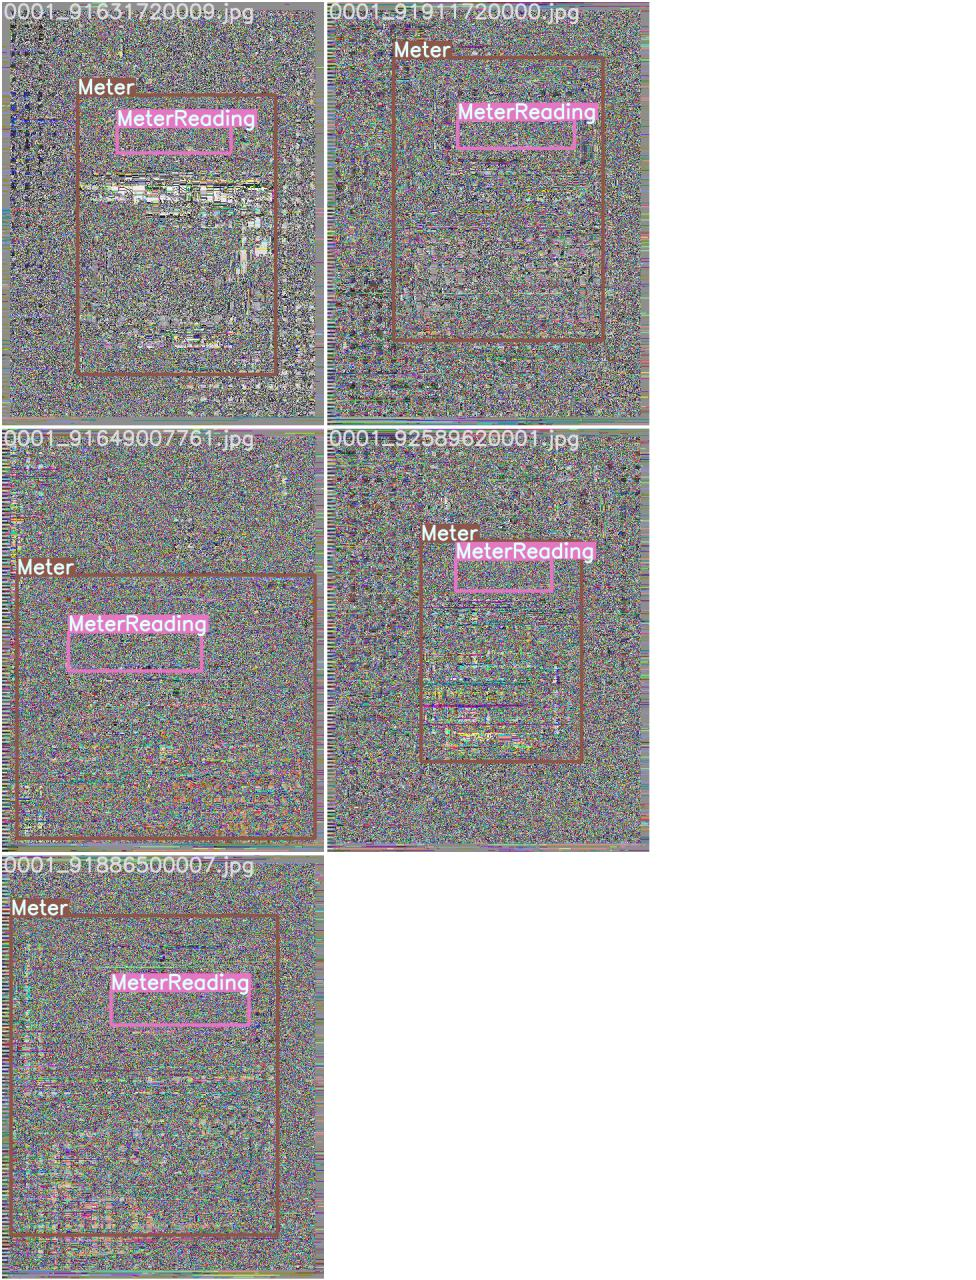

In [ ]:
print("TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5l_results3/test_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


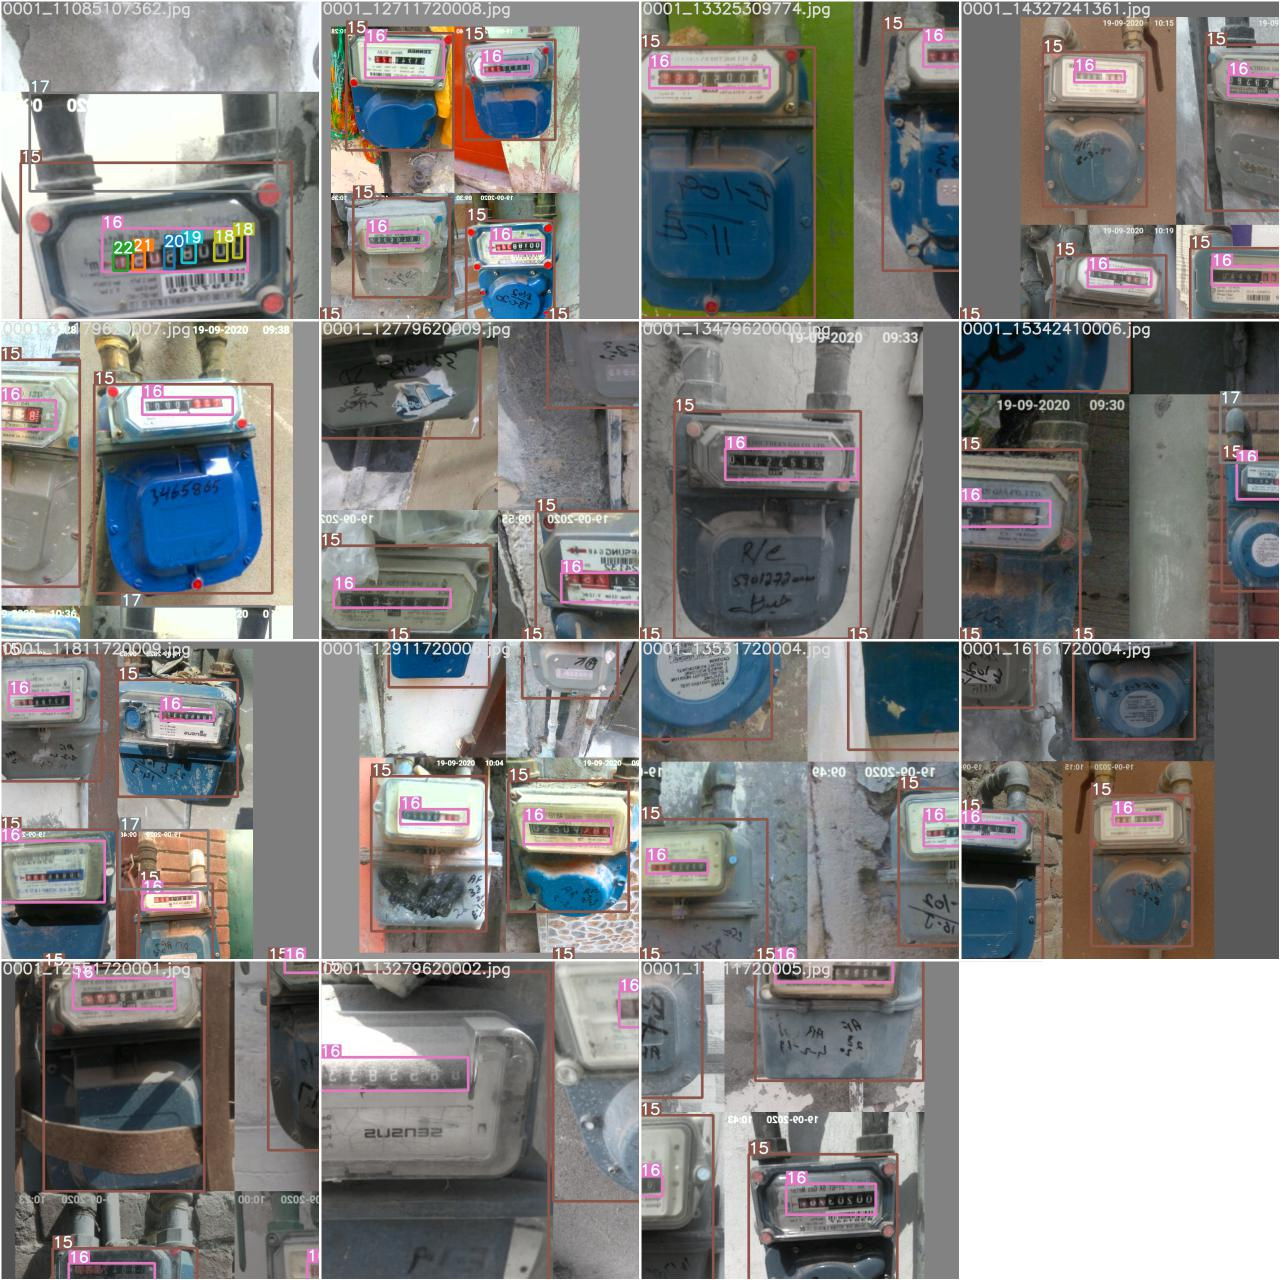

In [ ]:
# print out an augmented training example
print("AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5l_results2/train_batch2.jpg', width=900)

AUGMENTED TESTED DATA:


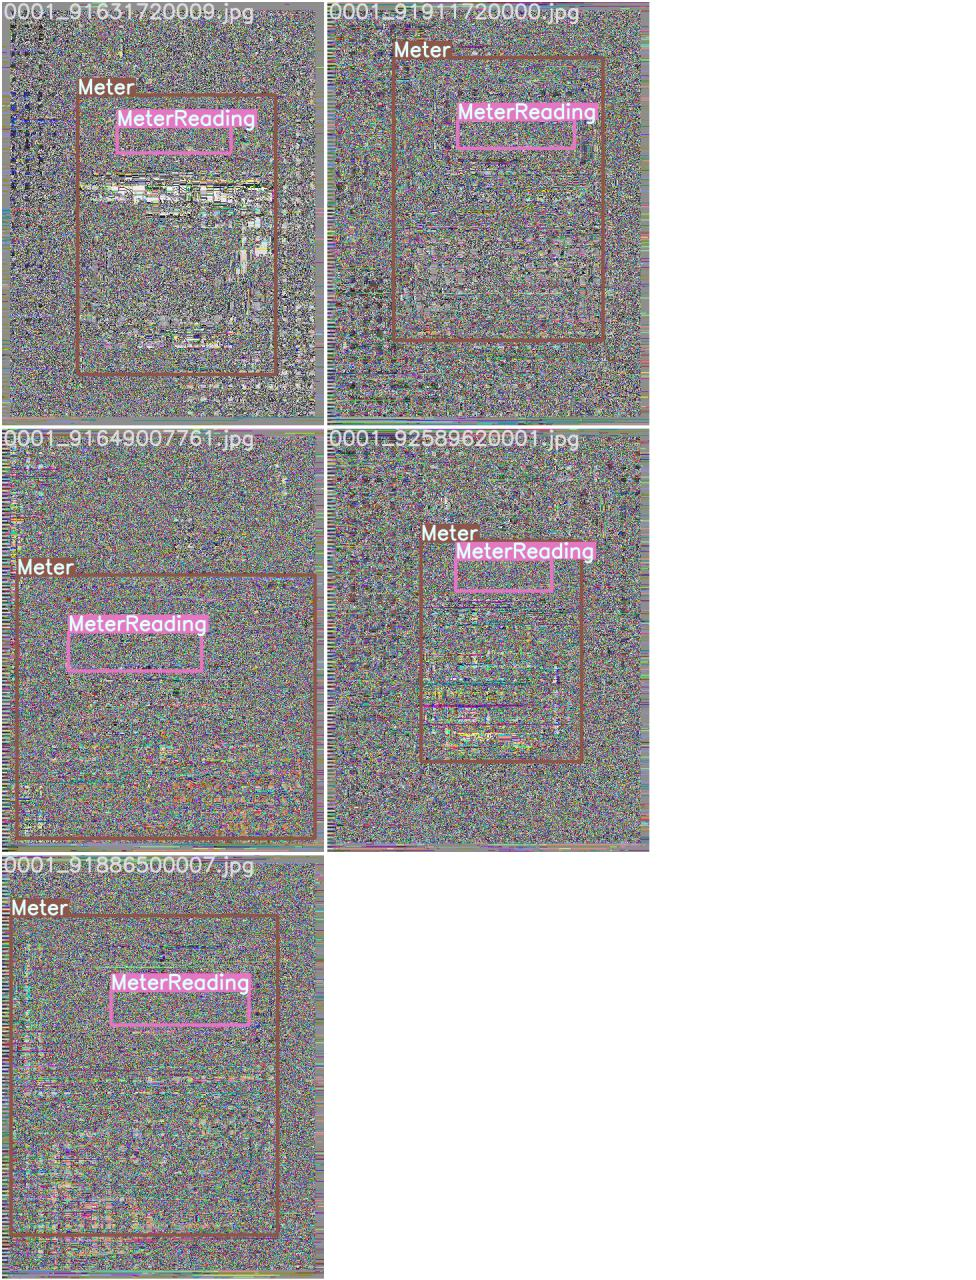

In [ ]:
# print out an tested example
print("AUGMENTED TESTED DATA:")
Image(filename='/content/yolov5/runs/train/yolov5l_results3/test_batch0_labels.jpg', width=900)